<a href="https://colab.research.google.com/github/kapilkn/ML/blob/master/MNIST_Hand_Written_Kapil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [0]:
xtrain.shape,ytrain.shape

((60000, 28, 28), (60000,))

In [0]:
xtest.shape,ytest.shape

((10000, 28, 28), (10000,))

In [0]:
xtrain[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
ytrain[10]

3

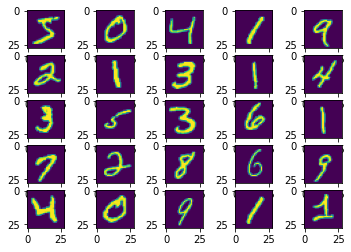

In [0]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(xtrain[i])
plt.show()


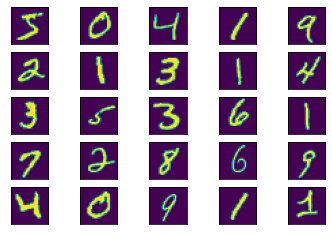

In [0]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(xtrain[i])
plt.show()

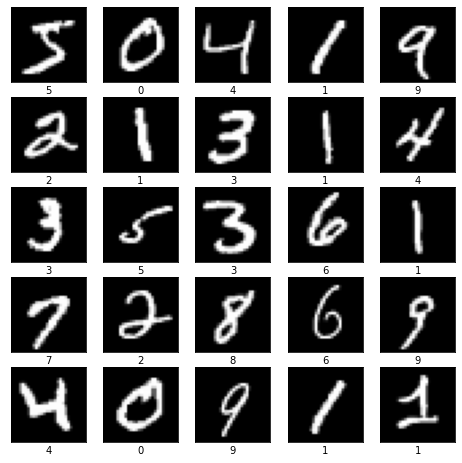

In [0]:
 plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xlabel(ytrain[i])
  plt.xticks([])
  plt.yticks([])
  plt.imshow(xtrain[i],cmap='gray')
plt.show()

## Normaliztion

In [0]:
xtrain = tf.keras.utils.normalize(xtrain)
xtest = tf.keras.utils.normalize(xtest)

## Build the model

In [0]:
model = tf.keras.models.Sequential()

# Add layers

In [0]:
model.add(tf.keras.layers.Flatten())                      # input layer (I dont know the dimension)
model.add(tf.keras.layers.Dense(784,activation='relu'))   # hidden layer (28x28)
model.add(tf.keras.layers.Dense(600,activation='relu'))   # hidden layer
model.add(tf.keras.layers.Dense(64,activation='relu'))    # hidden layer
model.add(tf.keras.layers.Dense(10,activation='softmax')) # output layer

## Configure the model

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [0]:
model.fit(xtrain,ytrain,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1997 - accuracy: 0.9384
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0915 - accuracy: 0.9720
Epoch 3/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0604 - accuracy: 0.9809


In [0]:
predictions = model.predict(xtest)

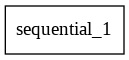

In [0]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=True
)

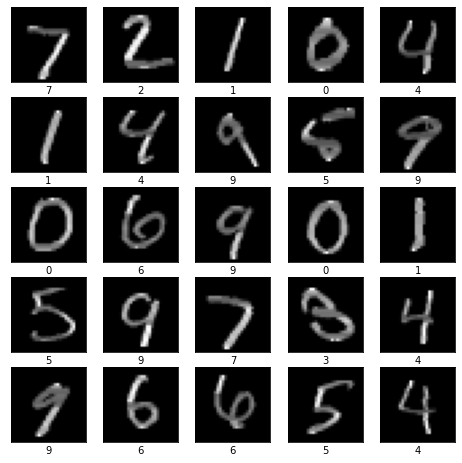

In [0]:
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xlabel(np.argmax(predictions[i]))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(xtest[i],cmap='gray')
plt.show()

## Evaluate ANN

In [0]:
loss,accu = model.evaluate(xtest,ytest)
print(loss,accu)

313/313 [==============================] - 1s 3ms/step - loss: 0.0861 - accuracy: 0.9767
0.08608347177505493 0.9767000079154968


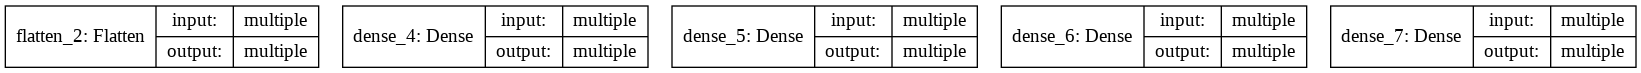

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Take a Picture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


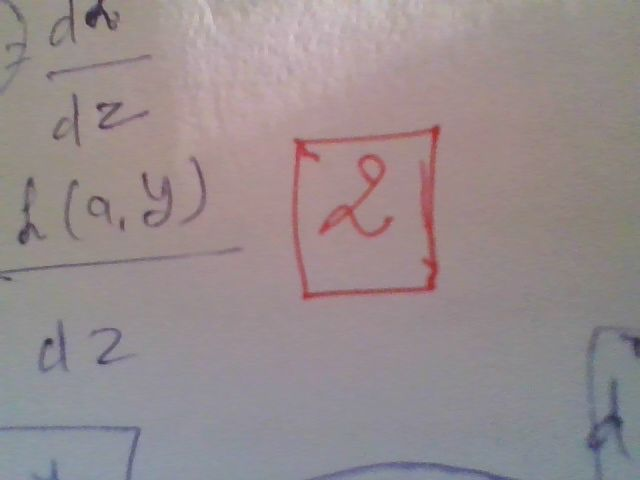

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

307200


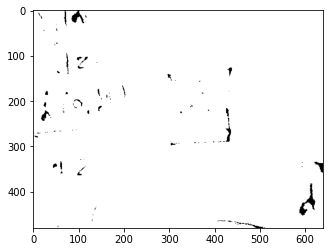

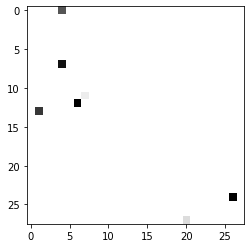

Probability Distribution for 0 0.19281743
Probability Distribution for 1 0.0077385404
Probability Distribution for 2 0.13011287
Probability Distribution for 3 0.03146449
Probability Distribution for 4 0.009581789
Probability Distribution for 5 0.3248219
Probability Distribution for 6 0.07833216
Probability Distribution for 7 0.13547507
Probability Distribution for 8 0.036273893
Probability Distribution for 9 0.05338181
The Predicted Value is 5


In [0]:
# Live image
from PIL import Image
import cv2
user_test = filename
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("a.png")
bw
img_array = cv2.imread("a.png", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test = tf.keras.utils.normalize(new_array, axis = 1)
predicted = model.predict(np.array([[user_test]]))
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))